# Data Pre-Processing || Handling Outliers
🦊 `Notebook by` [Md.Samiul Alim](https://github.com/sami0055)

😋  `Machine Learning Source Codes` [GitHub](https://github.com/sami0055/Machine-Learning)

# What is outliers?

In a dataset, outliers are data points that deviate significantly from the majority of observations. They can distort statistical analyses and machine learning models.

# Detect Outliers
Outliers can be detected using methods like visual inspection or statistical techniques, and handling them depends on the analysis goals—either removing them or investigating their underlying causes.

![image.png](https://media.licdn.com/dms/image/C5612AQHmj-jx1e72iA/article-inline_image-shrink_400_744/0/1592543224278?e=1708560000&v=beta&t=4MIb6fR1bcDD-kPW79lvYVJ6C-skeixKLgSgN2yFy84)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Code to save figures as High-res PNG
import os
from pathlib import Path
from matplotlib import pyplot as plt

IMAGES_PATH = Path() / "images/Outliers"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [9]:
#Load Dataset
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


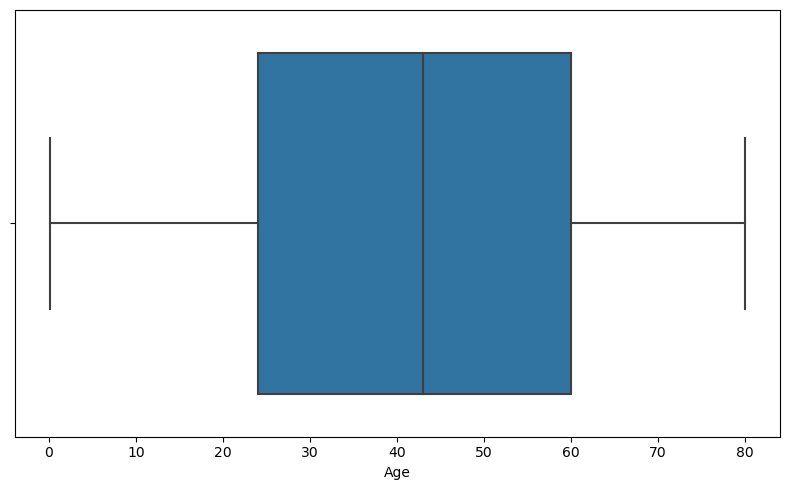

In [12]:
#Set a plot
plt.figure(figsize=(8,5))
#Box plot
sns.boxplot(x=df['age'])
plt.xlabel("Age")
save_fig('Age Outliers')
plt.show()

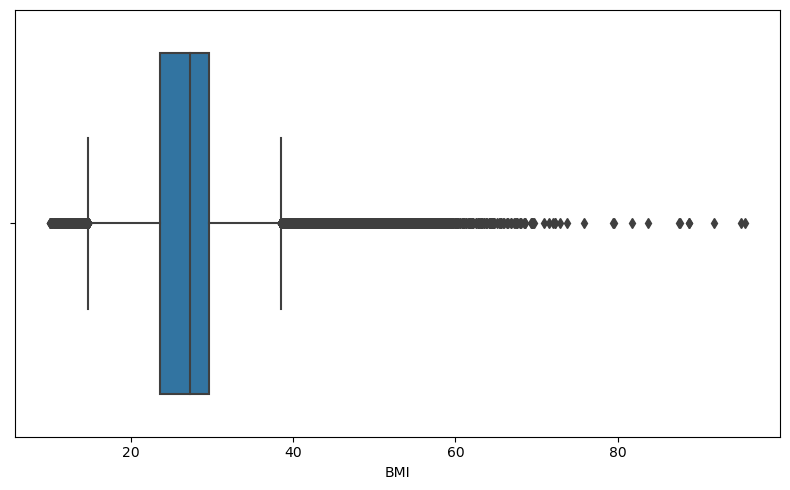

In [13]:
# Set a plot
plt.figure(figsize=(8,5))
# Boxplot
sns.boxplot(x=df['bmi'])
plt.xlabel('BMI')
save_fig('BMI Outliers')
plt.show()

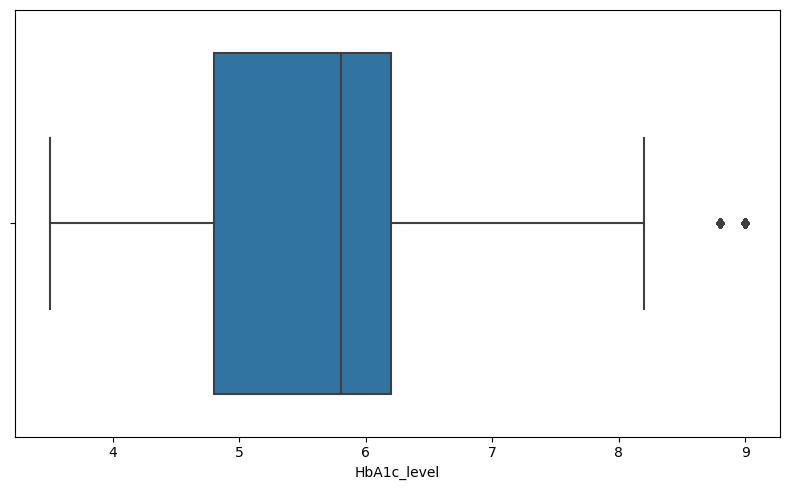

In [15]:
plt.figure(figsize=(8,5))
#Boxplot
sns.boxplot(x=df['HbA1c_level'])
plt.xlabel('HbA1c_level')
save_fig('HbAlc_level_Outliers')
plt.show()

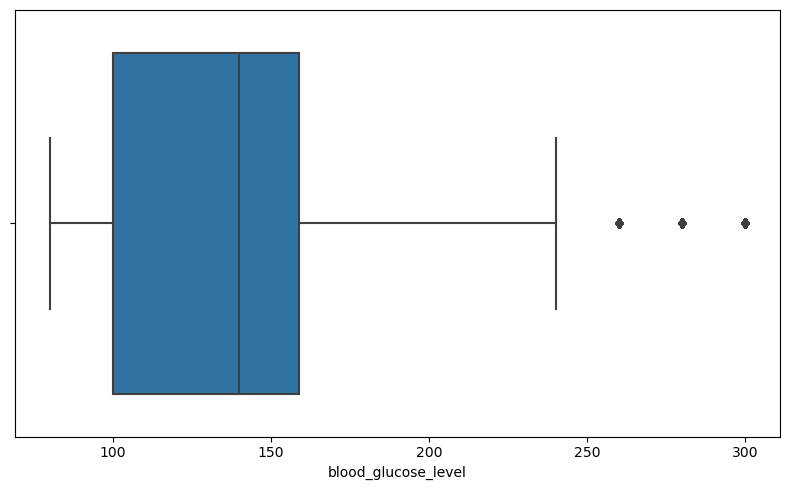

In [20]:
plt.figure(figsize=(8,5))
#Boxplot
sns.boxplot(x=df['blood_glucose_level'])
plt.xlabel('blood_glucose_level')
save_fig('blood_glucose_level_Outliers')
plt.show()

## Count Outliers

In [27]:
def count_outliers(data,column_name):
    column_data=data[column_name]
    #Calculate Q1 and Q3
    Q1=data[column_name].quantile(0.25)
    Q3=data[column_name].quantile(0.75)
    # Calculate IQR
    IQR=Q3-Q1
    #Min and MAx calculation
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    #Count outliers
    outliers=column_data[(column_data<lower_bound) |(column_data>upper_bound)]
    return len(outliers)

In [30]:
attributes=['age','bmi','HbA1c_level','blood_glucose_level']
for attribute in attributes:
    count=count_outliers(df,attribute)
    print(attribute,'-->',count,'out of',len(df[attribute]))

age --> 0 out of 100000
bmi --> 7086 out of 100000
HbA1c_level --> 1315 out of 100000
blood_glucose_level --> 2038 out of 100000


### Remove Outliers

In [40]:
def remove_outliers(data,column_name):
    column_data=data[column_name]
    #Calculate Q1 and Q3
    Q1=data[column_name].quantile(0.25)
    Q3=data[column_name].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    print('lower bound->',lower_bound,' Upper_bound-> ',upper_bound)
    #Remove outliers
    cleaned_df=data[(data[column_name]>=lower_bound)& (data[column_name]<=upper_bound)]
    return cleaned_df

In [41]:
cleaned_bmi= remove_outliers(df,'bmi')
print('Original df',df.shape)
print('Çleaned df',cleaned_bmi.shape)

lower bound-> 14.705  Upper_bound->  38.504999999999995
Original df (100000, 9)
Çleaned df (92914, 9)


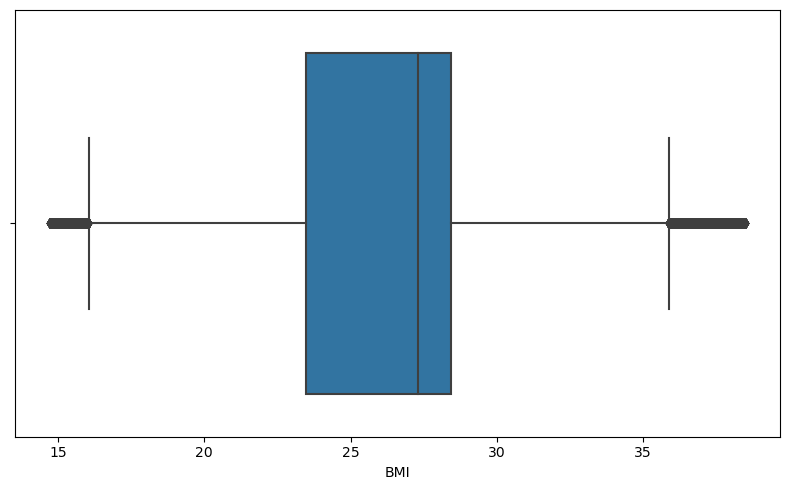

In [38]:
plt.figure(figsize=(8,5))
#Boxplot
sns.boxplot(x=cleaned_bmi['bmi'])
plt.xlabel('BMI')
save_fig('BMI outliers cleaned')
plt.show()

In [39]:
#Checking BMI
print(df.bmi.min())
print(df.bmi.max())
print(cleaned_bmi.bmi.min())
print(cleaned_bmi.bmi.max())

10.01
95.69
14.71
38.5


In [42]:
cleaned_HbA1c=remove_outliers(df,'HbA1c_level')
print('Orginal Df: ',df.shape)
print('Cleaned HbA1c ',cleaned_HbA1c.shape)

lower bound-> 2.6999999999999993  Upper_bound->  8.3
Orginal Df:  (100000, 9)
Cleaned HbA1c  (98685, 9)


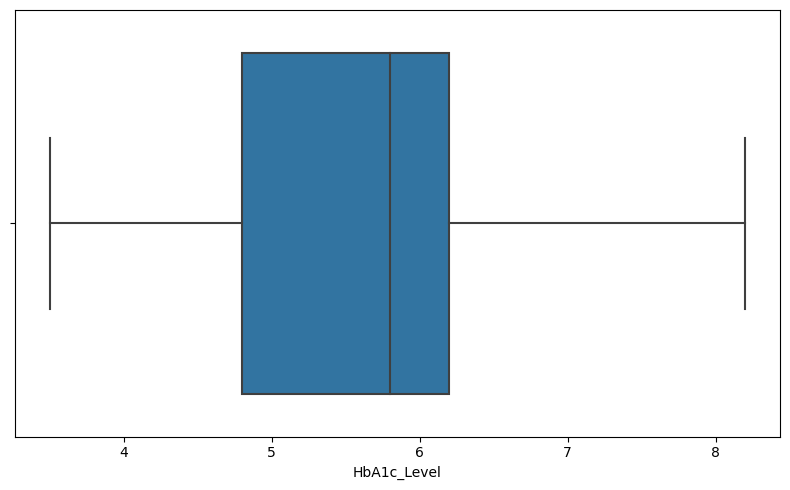

In [44]:
plt.figure(figsize=(8,5))
#Boxplot
sns.boxplot(x=cleaned_HbA1c['HbA1c_level'])
plt.xlabel("HbA1c_Level")
save_fig('HbA1c level outliers cleaned')
plt.show()

In [46]:
print(df.HbA1c_level.min())
print(df.HbA1c_level.max())
print(cleaned_HbA1c.HbA1c_level.min())
print(cleaned_HbA1c.HbA1c_level.max())

3.5
9.0
3.5
8.2


In [47]:
#cleaned Blood glucose level
df_cleaned=remove_outliers(df,'blood_glucose_level')
print('Original df: ',df.shape)
print('Cleaned df: ',df_cleaned.shape)

lower bound-> 11.5  Upper_bound->  247.5
Original df:  (100000, 9)
Cleaned df:  (97962, 9)


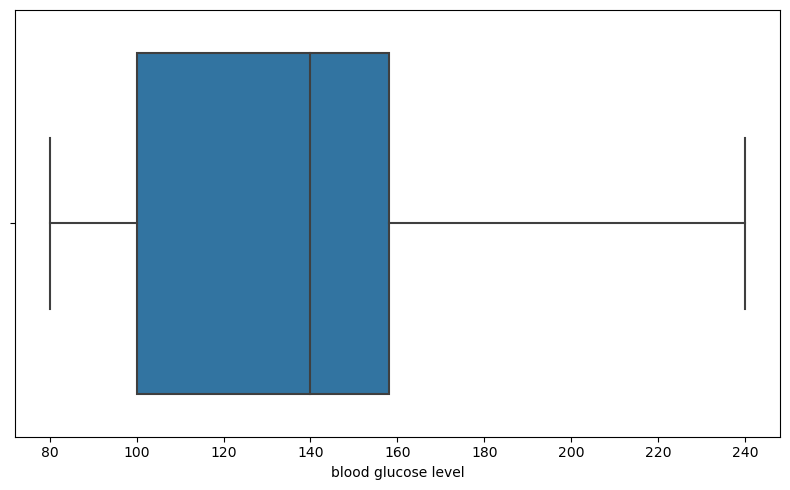

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned['blood_glucose_level'])
plt.xlabel('blood glucose level')
save_fig('blood glucose level outliers cleaned')
plt.show()

In [49]:
print(df.blood_glucose_level.min())
print(df.blood_glucose_level.max())
print(df_cleaned.blood_glucose_level.min())
print(df_cleaned.blood_glucose_level.max())

80
300
80
240


## Thank you